# Deep Learning - Artificial Neural Networks - Derin Ogrenme Yapay Sinir Aglari

Bugun insanin beyninin ogrenme modelini taklit ederekogrenen yapay sinir aglarini derinlemesine ogrenecegiz.

### Classification

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# !pip install tensorflow # cok boyutlu matris

In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
# x ve y oluturmak icin birinci yontem
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df[['Outcome']]

In [19]:
# x ve y oluturmak icin ikinci yontem
x=df.drop('Outcome',axis=1)
y=df[['Outcome']]

In [20]:
# x ve y oluturmak icin ucuncu yontem
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [ ]:
# Deep learning

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense

In [23]:
model=Sequential()
# Dense butun noron butun noron ile baglanacak anlamina gelir, activation relu en iyi calisandir
model.add(Dense(80, activation='relu')) # 1. noron hayal urunu 80 tane
model.add(Dense(120, activation='relu')) # 2. noron hayal urunu 120 tane
model.add(Dense(64, activation='relu')) # 3. noron hayal urunu 64 tane
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # classification son layer sigmoid olacak(sonu 0 veya 1 ise)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=1, epochs=10) # validation_split=0.10 ile train test split yapmaya gerek kalmadi

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 0.6615 - val_accuracy: 0.5714 - val_loss: 0.8521
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6657 - loss: 0.6282 - val_accuracy: 0.6364 - val_loss: 0.6656
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6860 - loss: 0.6149 - val_accuracy: 0.5584 - val_loss: 0.6811
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7106 - loss: 0.5873 - val_accuracy: 0.7013 - val_loss: 0.6628
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6889 - loss: 0.5879 - val_accuracy: 0.5974 - val_loss: 0.7009
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7019 - loss: 0.5879 - val_accuracy: 0.6234 - val_loss: 0.6797
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7077 - loss: 0.5652 - val_accuracy: 0.5584 - val_loss: 0.7375
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7192 - loss: 0.5802 - val_accuracy: 0.6494 - val_loss:

In [32]:
# epochs sokaklar arasi dolasmayi arttirarak accuracy arttirdik ve verbose=0 yaparak altta yazi cikmasini kapattik
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=0, epochs=100) 

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,175 (238.97 KB)

 Trainable params: 20,391 (79.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,784 (159.32 KB)

In [34]:
loss, accuracy=model.evaluate(x,y)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9544 - loss: 0.2117 


In [35]:
accuracy

0.9544270634651184

In [36]:
# derin ogrenme oncesi normalization yapmamiz gerekiyor

In [37]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [47]:
x=scaler.fit_transform(x)

In [48]:
# normalize etmis olduk simdi tekrardan derin ogrenme yapiyoruz (tensorflow data nin normalize edilmis halini istiyor)

In [49]:
history=model.fit(x,y, batch_size=32, validation_split=0.10, verbose=0, epochs=100) 

In [50]:
loss, accuracy=model.evaluate(x,y)
accuracy

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.3040 


0.97265625

In [51]:
# simdi grafigini cizdirelim

In [52]:
import matplotlib.pyplot as plt

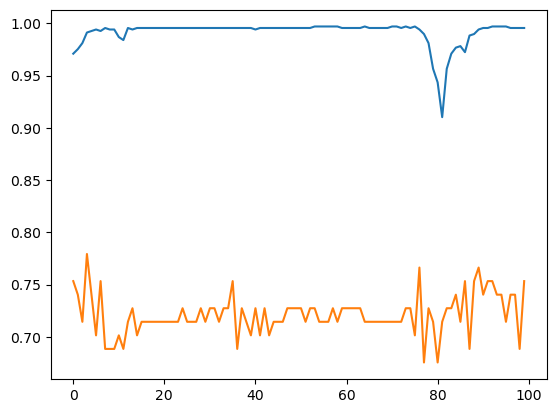

In [53]:
plt.plot(history.history['accuracy']) # gordugu data
plt.plot(history.history['val_accuracy']) # gormedigi data

### Regression

In [56]:
df=pd.read_pickle('kc_house.pkl') # future engine yapilmis islemi data pkl olarak kaydedilmis ve getirilmis oluyor(House)

In [57]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
x=df.drop('price', axis=1)
y=df[['price']]

In [59]:
x=scaler.fit_transform(x)

In [60]:
model=Sequential()
# Dense butun noron butun noron ile baglanacak anlamina gelir, activation relu en iyi calisandir
model.add(Dense(80, activation='relu')) # 1. noron hayal urunu 80 tane
model.add(Dense(120, activation='relu')) # 2. noron hayal urunu 120 tane
model.add(Dense(64, activation='relu')) # 3. noron hayal urunu 64 tane
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # Regression oldugundan dolayi sigmoid kaldirdik

model.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# bu sefer train test split ayirarak yapalim

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [ ]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=64, verbose=1, epochs=120) 

In [68]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
r2_score(y_test,tahmin)

0.8488237261772156

In [71]:
mean_squared_error(y_test,tahmin)**.5

87970.56380403618

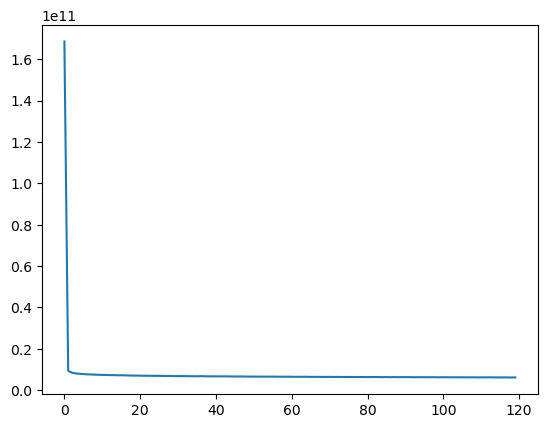

In [73]:
plt.plot(history.history['loss'])

### Early Stopping - en optumum durumda durarak en iyi accuricy vs buluyor ve bilgisayari yormuyor

In [80]:
df=pd.read_excel('cars.xls')

In [81]:
x=df.drop('Price', axis=1)
y=df[['Price']]

In [82]:
x=pd.get_dummies(x,drop_first=True)

In [83]:
x=scaler.fit_transform(x) # normalizatin yapildi

In [84]:
model=Sequential()
model.add(Dense(80, activation='relu')) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(149, activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) 

model.compile(loss='mean_squared_error', optimizer='adam')

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
early_stop=EarlyStopping(monitor='val_loss',patience=10)

In [87]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=130,batch_size=32,callbacks=[early_stop],verbose=1)

Epoch 1/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50174504960.0000 - val_loss: 8944253952.0000
Epoch 2/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8231870464.0000 - val_loss: 8448510464.0000
Epoch 3/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7927809024.0000 - val_loss: 8139161088.0000
Epoch 4/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7701215232.0000 - val_loss: 8136261120.0000
Epoch 5/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7565527040.0000 - val_loss: 9055733760.0000
Epoch 6/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7439814656.0000 - val_loss: 8022947840.0000
Epoch 7/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7347943424.0000 - val_loss: 8002884096.0000
Epoch 8/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7316207104.0000 - val_loss: 8162263552.0000
Epoch 9/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7225946112.0000 - val_loss: 8296787968.0000
Epoch 10/130
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [88]:
# 24. adimda durdu

In [89]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [90]:
r2_score(tahmin, y_test)

0.8186345100402832

In [91]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/109.3 MB 6.0 MB/s eta 0:00:19
    --------------------------------------- 1.8/109.3 MB 5.8 MB/s eta 0:00:19
   - -------------------------------------- 3.1/109.3 MB 5.9 MB/s eta 0:00:18
   - -------------------------------------- 4.5/109.3 MB 5.7 MB/s eta 0:00:19
   -- ------------------------------------- 5.8/109.3 MB 5.8 MB/s eta 0:00:18
   -- ------------------------------------- 6.8/109.3 MB 5.8 MB/s eta 0:00:18
   -- ------------------------------------- 8.1/109.3 MB 5.8 MB/s eta 0:00:18
   --- ------------------------------------ 9.4/109.3 MB 5.9 MB/s eta 0:00:18
   --- ------------------------------------ 10.5/109.3 MB 5.7 MB/s eta 0:00:18
   ---- ----------------------------------- 11.5/109.3 MB 5.7 MB/s eta 0:00:18
   ---- ----------------------------------- 12.8/109.3 MB 5.7 MB/s et

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [93]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Veri hazırlığı
x = df.drop('Price', axis=1)
y = df[['Price']]

# One-Hot Encoding
x = pd.get_dummies(x, drop_first=True)

# Veri tiplerini kontrol et ve dönüştür
x = x.astype(float)
y = y.astype(float)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Eksik değer kontrolü (isteğe bağlı)
print(x_train.isnull().sum())
print(y_train.isnull().sum())

# PyTorch tensörlerine dönüştürme
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Model tanımı
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 1)

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        x = nn.ReLU()(self.fc4(x))
        x = nn.ReLU()(self.fc5(x))
        x = nn.ReLU()(self.fc6(x))
        x = self.fc7(x)
        return x

# Modeli oluşturma
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Eğitim döngüsü
epochs = 130
batch_size = 32
for epoch in range(epochs):
    model.train()
    
    # Mini-batch'ler oluşturma
    for i in range(0, len(x_train_tensor), batch_size):
        x_batch = x_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    # Her 10 epoch'ta bir kaybı yazdırma
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Modeli test etme
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_loss = mean_squared_error(y_test_tensor.numpy(), test_outputs.numpy())
    print(f'Test Loss: {test_loss}')

Mileage               0
Cylinder              0
Liter                 0
Doors                 0
Cruise                0
                     ..
Trim_Sportwagon 4D    0
Type_Coupe            0
Type_Hatchback        0
Type_Sedan            0
Type_Wagon            0
Length: 93, dtype: int64
Price    0
dtype: int64
Epoch 0, Loss: 500403712.0
Epoch 10, Loss: 227042304.0
Epoch 20, Loss: 226957440.0
Epoch 30, Loss: 229300608.0
Epoch 40, Loss: 231284144.0
Epoch 50, Loss: 233001552.0
Epoch 60, Loss: 233371440.0
Epoch 70, Loss: 232064944.0
Epoch 80, Loss: 228076496.0
Epoch 90, Loss: 217016528.0
Epoch 100, Loss: 189391312.0
Epoch 110, Loss: 64959644.0
Epoch 120, Loss: 25714158.0
Test Loss: 28813086.0
